In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("train.csv")
df.head()
test = pd.read_csv("test.csv")

In [52]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [53]:
# Store total number of observation in training dataset
df_length =len(df)

# Store total number of columns in testing data set
test_col = len(test.columns)

In [54]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [55]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

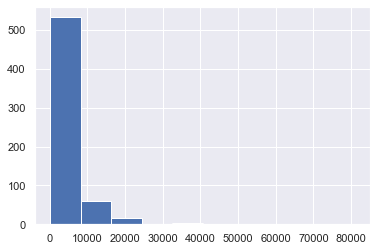

In [56]:
# Box Plot for understanding the distributions and to observe the outliers.

%matplotlib inline

# Histogram of variable ApplicantIncome

df['ApplicantIncome'].hist()

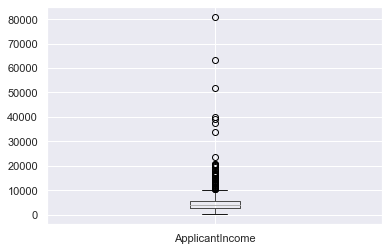

In [57]:
# Box Plot for variable ApplicantIncome of training data set

df.boxplot(column='ApplicantIncome')

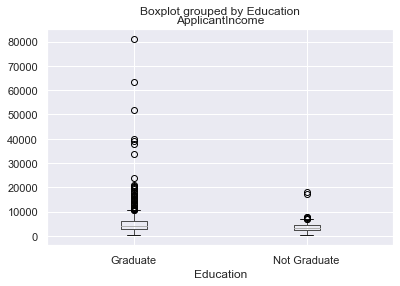

In [58]:
# Box Plot for variable ApplicantIncome by variable Education of training data set

df.boxplot(column='ApplicantIncome', by = 'Education')

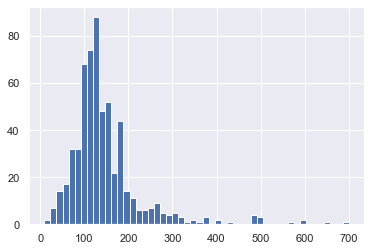

In [59]:
# Histogram of variable LoanAmount

df['LoanAmount'].hist(bins=50)

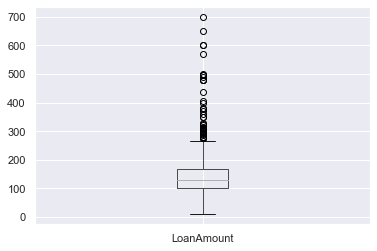

In [60]:
# Box Plot for variable LoanAmount of training data set

df.boxplot(column='LoanAmount')

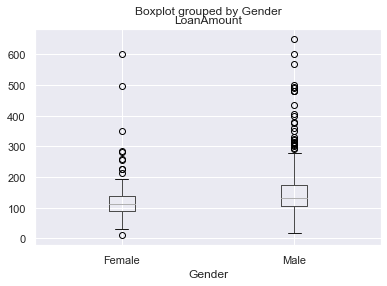

In [61]:
# Box Plot for variable LoanAmount by variable Gender of training data set

df.boxplot(column='LoanAmount', by = 'Gender')

# Understanding Distribution of Categorical Variables


In [62]:
loan_approval = df['Loan_Status'].value_counts()['Y']
print(loan_approval)


422


In [63]:
# Credit History and Loan Status
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [64]:
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].str.rstrip('+')
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(np.int)
df['Married'] = df['Married'].map({'No':0, 'Yes':1}).astype(np.int)
df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
df['Dependents'] = df['Dependents'].astype(np.int)

In [65]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [66]:
df.dtypes


Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [67]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,Urban,1


In [68]:
X,y  = df.iloc[:, 1:-1], df.iloc[:, -1]


In [69]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,Rural
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,Rural
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,Urban
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,Urban


In [70]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [71]:
X= pd.get_dummies(X)


In [76]:
dtrain= pd.get_dummies(df)
import xgboost as xgb
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
train = dtrain
target = 'Loan_Status'
IDcol = 'Loan_ID'

In [117]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics



In [94]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Loan_Status'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Loan_Status'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Loan_Status'], dtrain_predprob))
                    
    

In [95]:

#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8,
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb2, train, predictors)



Model Report
Accuracy : 0.8388
AUC Score (Train): 0.952810


In [97]:
param_test1 = { 'max_depth':list(range(3,10,2)), 'min_child_weight':list(range(1,6,2))}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.cv_results_ , gsearch1.best_params_, gsearch1.best_score_

C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([3.89492946, 3.4432754 , 3.46753621, 5.62385764, 5.46077485,
         5.27767429, 7.41217175, 6.9832056 , 5.81065106, 8.8631165 ,
         7.36281428, 5.23475757]),
  'std_fit_time': array([0.33674267, 0.37607516, 0.35317714, 0.12703168, 0.06989576,
         0.11260196, 0.2679276 , 0.18397736, 0.10086015, 0.3638946 ,
         0.18388614, 0.48775512]),
  'mean_score_time': array([0.07411976, 0.0505043 , 0.05525956, 0.07153769, 0.06580482,
         0.06535263, 0.07552495, 0.07489047, 0.07308836, 0.07705617,
         0.07402816, 0.05934381]),
  'std_score_time': array([0.02676013, 0.00355969, 0.00650572, 0.0077885 , 0.00736024,
         0.01210536, 0.00960625, 0.01016446, 0.00704599, 0.01131947,
         0.00590957, 0.01454662]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

In [98]:
param_test2 = { 'max_depth':[8,9,10], 'min_child_weight':[4,5,6] }
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([7.13823762, 6.20157809, 5.82833676, 6.63496947, 6.09796171,
         5.66797767, 6.60380778, 6.03818235, 4.84499397]),
  'std_fit_time': array([0.23590883, 0.1293885 , 0.08056732, 0.13258277, 0.10223524,
         0.04968293, 0.08676822, 0.07473108, 1.25978922]),
  'mean_score_time': array([0.09305091, 0.06429839, 0.06231461, 0.07070236, 0.07728162,
         0.06325169, 0.0712554 , 0.07943802, 0.0871532 ]),
  'std_score_time': array([0.04013507, 0.01565628, 0.01178703, 0.00466111, 0.00671516,
         0.00754623, 0.00559242, 0.00376642, 0.05857589]),
  'param_max_depth': masked_array(data=[8, 8, 8, 9, 9, 9, 10, 10, 10],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
      

In [101]:
param_test2c = {
 'min_child_weight':[6,7]
}
gsearch2c = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=8,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2c.fit(train[predictors],train[target])
gsearch2c.cv_results_, gsearch2c.best_params_, gsearch2c.best_score_

C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([6.7156117 , 6.22588177, 5.73117447, 6.74439087, 6.14342194,
         5.67496848, 6.79462261, 6.11795053, 4.7999959 ]),
  'std_fit_time': array([0.06606917, 0.11175643, 0.07962723, 0.1328164 , 0.09993673,
         0.16041915, 0.16935568, 0.15183761, 1.0736658 ]),
  'mean_score_time': array([0.05998039, 0.06137428, 0.06362009, 0.07733917, 0.06517458,
         0.06769266, 0.07119083, 0.06900535, 0.08773136]),
  'std_score_time': array([0.00713337, 0.00872684, 0.0074451 , 0.01042592, 0.00555174,
         0.00635914, 0.00663062, 0.00467538, 0.042577  ]),
  'param_max_depth': masked_array(data=[8, 8, 8, 9, 9, 9, 10, 10, 10],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
      

In [102]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([5.75927458, 5.76386924, 5.29902358, 5.50627928, 5.03611126]),
  'std_fit_time': array([0.06703015, 0.11748014, 0.1027908 , 0.1941008 , 1.37345174]),
  'mean_score_time': array([0.06548715, 0.06652136, 0.08078389, 0.06843209, 0.05560822]),
  'std_score_time': array([0.01451308, 0.01336757, 0.00579866, 0.00620464, 0.01235552]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.76811146, 0.76965944, 0.76439628, 0.7622291 , 0.76099071]),
  'split1_test_score': array([0.75603715, 0.76625387, 0.76749226, 0.75727554, 0.76377709]),
  'split2_test_score': array([0.76648352, 0.76739927, 0.76587302, 0.76465201, 0.77472527]),
  'split3_test_score': array([0.82448107, 0.82905983, 0.82448107, 0.82631258, 0.83333333]),

In [103]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.9,
                     colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb2, train, predictors)



Model Report
Accuracy : 0.8469
AUC Score (Train): 0.933575


In [104]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([4.72907882, 5.36118097, 5.68537803, 6.08515763, 5.37093377,
         5.79623661, 6.25275679, 6.78416266, 5.79738879, 7.57196031,
         7.09725561, 7.49292655, 6.2872273 , 7.06065197, 7.48781114,
         7.29731417]),
  'std_fit_time': array([0.1958164 , 0.05767039, 0.07731421, 0.07055087, 0.08622147,
         0.04668282, 0.06166666, 0.19518603, 0.11862631, 0.43853192,
         0.12947933, 0.17000017, 0.04025553, 0.25751147, 0.36262114,
         0.82547795]),
  'mean_score_time': array([0.06265006, 0.06732192, 0.08244057, 0.07938213, 0.07388968,
         0.07725191, 0.07819333, 0.0784955 , 0.07865119, 0.08047843,
         0.08018608, 0.08044643, 0.06978612, 0.07595739, 0.07757459,
         0.05913253]),
  'std_score_time': array([0.01160763, 0.00877702, 0.0072942 , 0.01136881, 0.00431039,
         0.00971413, 0.01712522, 0.01044744, 0.01074508, 0.00780467,
         0.00710338, 0.00656901, 0.00539903, 0.00880768, 0.0073853 ,
         0.01198468]),
  'param_c

In [105]:
param_test4a = {
 'subsample':[i/10.0 for i in range(9,12)],
 'colsample_bytree':[i/10.0 for i in range(9,12)]
}
gsearch4a = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([4.78736815, 4.91446028, 5.69478216, 6.06188059, 5.30394177,
         5.81080537, 6.23051581, 6.9542891 , 5.7519186 , 6.2860683 ,
         6.96420979, 7.46648741, 6.24911823, 7.10642347, 7.51671519,
         7.19719729]),
  'std_fit_time': array([0.22516771, 0.34298573, 0.11234949, 0.09655938, 0.09214885,
         0.06201373, 0.06831982, 0.42686731, 0.08575939, 0.05079824,
         0.30222175, 0.21321011, 0.07174882, 0.23924321, 0.31856345,
         1.00392381]),
  'mean_score_time': array([0.07312675, 0.07420263, 0.06793275, 0.0770987 , 0.07441983,
         0.07733002, 0.07334785, 0.07869368, 0.08072586, 0.07094903,
         0.0821424 , 0.08596716, 0.07913399, 0.07765179, 0.07860713,
         0.06971903]),
  'std_score_time': array([0.00916329, 0.01057785, 0.00966625, 0.00593524, 0.01214475,
         0.01216597, 0.01557452, 0.00629252, 0.00816017, 0.00851986,
         0.01239375, 0.01559813, 0.00853683, 0.00991116, 0.00629503,
         0.03389935]),
  'param_c

In [106]:
param_test5 = {
 'subsample':[i/100.0 for i in range(95,105,5)],
 'colsample_bytree':[i/100.0 for i in range(95,105,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([ 8.72747011,  9.26026459,  9.61295638, 10.3098865 ]),
  'std_fit_time': array([0.29994243, 0.27988944, 0.79460521, 0.20583571]),
  'mean_score_time': array([0.07033844, 0.06195598, 0.06761646, 0.06488175]),
  'std_score_time': array([0.01002265, 0.01108426, 0.00543054, 0.01220667]),
  'param_colsample_bytree': masked_array(data=[0.95, 0.95, 1.0, 1.0],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.95, 1.0, 0.95, 1.0],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'colsample_bytree': 0.95, 'subsample': 0.95},
   {'colsample_bytree': 0.95, 'subsample': 1.0},
   {'colsample_bytree': 1.0, 'subsample': 0.95},
   {'colsample_bytree': 1.0, 'subsample': 1.0}],
  'split0_test_score': array([0.78142415, 0.76842105, 0.7879257 , 0.78544892]),
  'split1_test_score': array([0.76130031, 0.75913313, 0.769349

In [107]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.95, colsample_bytree=0.95,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([9.0763555 , 8.86288838, 8.84183497, 9.02339101, 2.22584629]),
  'std_fit_time': array([0.25256897, 0.42195311, 0.37405063, 0.42092099, 0.62709113]),
  'mean_score_time': array([0.06598034, 0.05686226, 0.06378012, 0.07412944, 0.06948066]),
  'std_score_time': array([0.01148322, 0.01271854, 0.00516877, 0.01009012, 0.01452613]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.78142415, 0.78297214, 0.77925697, 0.77151703, 0.70464396]),
  'split1_test_score': array([0.76130031, 0.7628483 , 0.75294118, 0.76470588, 0.65928793]),
  'split2_test_score': array([0.76404151, 0.76221001, 0.76739927, 0.77319902, 0.66758242]),
  'split3_test_score': array([0.82509158, 0.84340659, 0.8452381 ,

In [108]:
param_test6a = {
 'reg_alpha':[1,2,3,4,5]
}
gsearch6a = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.95, colsample_bytree=0.95,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6a, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6a.fit(train[predictors],train[target])
gsearch6a.cv_results_, gsearch6a.best_params_, gsearch6a.best_score_

C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([7.26416845, 6.8161665 , 5.98439155, 5.38399925, 4.23387299]),
  'std_fit_time': array([0.1113139 , 0.10964411, 0.1756871 , 0.17395145, 1.19565558]),
  'mean_score_time': array([0.05764599, 0.05844388, 0.05684814, 0.05425315, 0.05106449]),
  'std_score_time': array([0.00840147, 0.00731797, 0.00553496, 0.00312628, 0.01740501]),
  'param_reg_alpha': masked_array(data=[1, 2, 3, 4, 5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1},
   {'reg_alpha': 2},
   {'reg_alpha': 3},
   {'reg_alpha': 4},
   {'reg_alpha': 5}],
  'split0_test_score': array([0.77151703, 0.76377709, 0.75510836, 0.75386997, 0.75108359]),
  'split1_test_score': array([0.76470588, 0.76408669, 0.76315789, 0.76439628, 0.75541796]),
  'split2_test_score': array([0.77319902, 0.76465201, 0.7518315 , 0.73901099, 0.7214591 ]),
  'split3_test_score': array([0.84096459, 0.83211233, 0.83089133, 0.82600733, 0.8205128

In [109]:
xgb3 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb3, train, predictors)



Model Report
Accuracy : 0.8143
AUC Score (Train): 0.921104


In [110]:
from sklearn.preprocessing import StandardScaler
slc= StandardScaler()
X_train_std = slc.fit_transform(X)

In [122]:
X=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Married',
        'Gender','Education','Self_Employed','Dependents']].values
y=df[["Loan_Status"]].values

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [125]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators =400, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)
forest.fit(X_train,y_train)


C:\Users\owner\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [127]:
forest.score(X_train,y_train)


1.0

In [129]:
forest.score(X_test,y_test)


0.7891891891891892

In [130]:
from xgboost.sklearn import XGBClassifier
#xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     #colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb1=XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.9,
                     colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [137]:
modelfit(xgb1, train, predictors)



Model Report
Accuracy : 0.8469
AUC Score (Train): 0.933575


In [113]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)


In [132]:
ada.fit(X_train,y_train)


C:\Users\owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [133]:
ada.score(X_train,y_train)

0.8275058275058275

In [139]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('forest', forest), ('xgb', xgb1), ('adaboost', ada)], voting='hard')

In [140]:
eclf.fit(X_train_std, y)


C:\Users\owner\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
 

In [141]:
dtest = pd.read_csv('test.csv')
dtest

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [142]:
dtest['Gender'] = dtest['Gender'].map({'Female':0,'Male':1})
dtest['Married'] = dtest['Married'].map({'No':0, 'Yes':1}).astype(np.int)
dtest['Education'] = dtest['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
dtest['Self_Employed'] = dtest['Self_Employed'].map({'No':0, 'Yes':1})
dtest['Dependents'] = dtest['Dependents'].str.rstrip('+')
dtest['Gender'] = dtest['Gender'].fillna( dtest['Gender'].dropna().mode().values[0]).astype(np.int)
dtest['Dependents'] = dtest['Dependents'].fillna( dtest['Dependents'].dropna().mode().values[0]).astype(np.int)
dtest['Self_Employed'] = dtest['Self_Employed'].fillna( dtest['Self_Employed'].dropna().mode().values[0])
dtest['LoanAmount'] = dtest['LoanAmount'].fillna( dtest['LoanAmount'].dropna().mode().values[0])
dtest['Loan_Amount_Term'] = dtest['Loan_Amount_Term'].fillna( dtest['Loan_Amount_Term'].dropna().mode().values[0])
dtest['Credit_History'] = dtest['Credit_History'].fillna( dtest['Credit_History'].dropna().mode().values[0] )

In [143]:
X_test = dtest.iloc[:,1:]


In [144]:
X_test= pd.get_dummies(X_test)


In [145]:
X_test_std = slc.transform(X_test)


In [146]:
y_test_pred = eclf.predict(X_test_std)


In [147]:
dtest['Loan_Status'] = y_test_pred
df_final = dtest.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'], axis=1)

In [148]:
df_final['Loan_Status'] = df_final['Loan_Status'].map({0:'N', 1:'Y'})


In [149]:
df_final.to_csv('my_submission7.csv', index=False)


In [150]:
df_final.head()


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
